## Import modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Data exploration

In [2]:
train = pd.read_csv("./train.csv")
train

,City,Restaurant,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-10,24924.50,False
1,1,1,12-02-10,46039.49,True
2,1,1,19-02-10,41595.55,False
3,1,1,26-02-10,19403.54,False
4,1,1,05-03-10,21827.90,False
...,...,...,...,...,...
137933,20,99,25-11-11,12550.00,True
137934,20,99,09-12-11,1645.00,False
137935,20,99,16-12-11,4870.00,False
137936,20,99,23-12-11,4420.00,False


In [3]:
data = pd.read_csv("./data.csv")
data

,City,Date,Temperature,Fuel_Price,Unemployment,IsHoliday
0,1,05-02-10,42.31,2.572,8.106,False
1,1,12-02-10,38.51,2.548,8.106,True
2,1,19-02-10,39.93,2.514,8.106,False
3,1,26-02-10,46.63,2.561,8.106,False
4,1,05-03-10,46.50,2.625,8.106,False
...,...,...,...,...,...,...
3635,20,28-06-13,74.02,3.639,NaN,False
3636,20,05-07-13,72.97,3.614,NaN,False
3637,20,12-07-13,72.59,3.614,NaN,False
3638,20,19-07-13,77.50,3.737,NaN,False


In [4]:
restaurants = pd.read_csv("./restaurants.csv")
restaurants

,City,Size
0,1,151315
1,2,202307
2,3,37392
3,4,205863
4,5,34875
5,6,202505
6,7,70713
7,8,155078
8,9,125833
9,10,126512


In [5]:
test = pd.read_csv("./test.csv")
test

,City,Restaurant,Date,IsHoliday
0,1,1,06-01-12,False
1,1,1,13-01-12,False
2,1,1,20-01-12,False
3,1,1,27-01-12,False
4,1,1,03-02-12,False
...,...,...,...,...
59606,20,99,07-09-12,True
59607,20,99,14-09-12,False
59608,20,99,21-09-12,False
59609,20,99,05-10-12,False


Т.к. данные разбросаны по разным файлам необходимо из объединить.

In [6]:
train_dataset = train.merge(data, how='left').merge(restaurants, how='left')
train_dataset

,City,Restaurant,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Unemployment,Size
0,1,1,05-02-10,24924.50,False,42.31,2.572,8.106,151315
1,1,1,12-02-10,46039.49,True,38.51,2.548,8.106,151315
2,1,1,19-02-10,41595.55,False,39.93,2.514,8.106,151315
3,1,1,26-02-10,19403.54,False,46.63,2.561,8.106,151315
4,1,1,05-03-10,21827.90,False,46.50,2.625,8.106,151315
...,...,...,...,...,...,...,...,...,...
137933,20,99,25-11-11,12550.00,True,46.38,3.492,7.082,203742
137934,20,99,09-12-11,1645.00,False,41.64,3.415,7.082,203742
137935,20,99,16-12-11,4870.00,False,37.16,3.413,7.082,203742
137936,20,99,23-12-11,4420.00,False,40.19,3.389,7.082,203742


In [7]:
train_dataset.shape

(137938, 9)

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137938 entries, 0 to 137937
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   City          137938 non-null  int64  
 1   Restaurant    137938 non-null  int64  
 2   Date          137938 non-null  object 
 3   Weekly_Sales  137938 non-null  float64
 4   IsHoliday     137938 non-null  bool   
 5   Temperature   137938 non-null  float64
 6   Fuel_Price    137938 non-null  float64
 7   Unemployment  137938 non-null  float64
 8   Size          137938 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 9.6+ MB


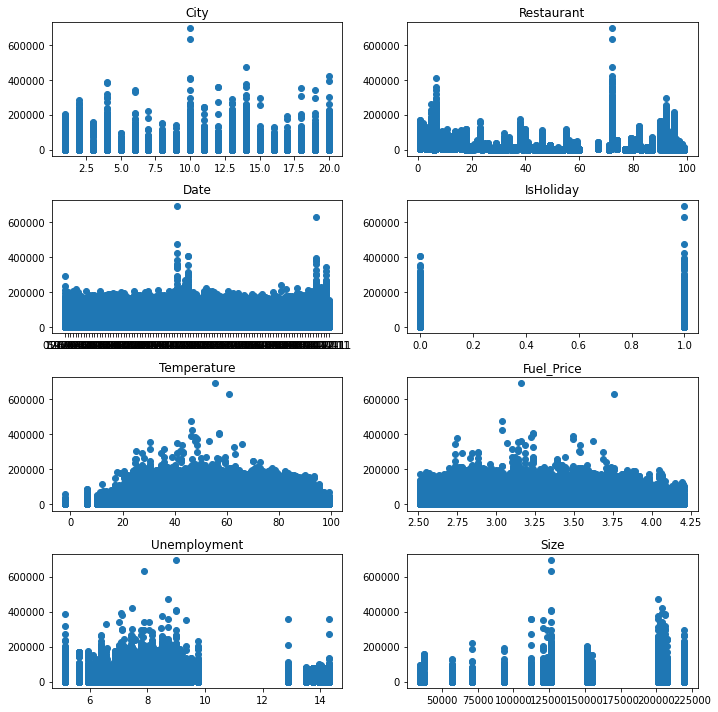

In [9]:
plt.figure(figsize=(10,10))
for i, col in enumerate(train_dataset.drop(['Weekly_Sales'], axis=1).columns):
    plt.subplot(4, 2, i + 1)
    plt.tight_layout()
    plt.scatter(train_dataset[col], train_dataset['Weekly_Sales'])
    plt.title(col)

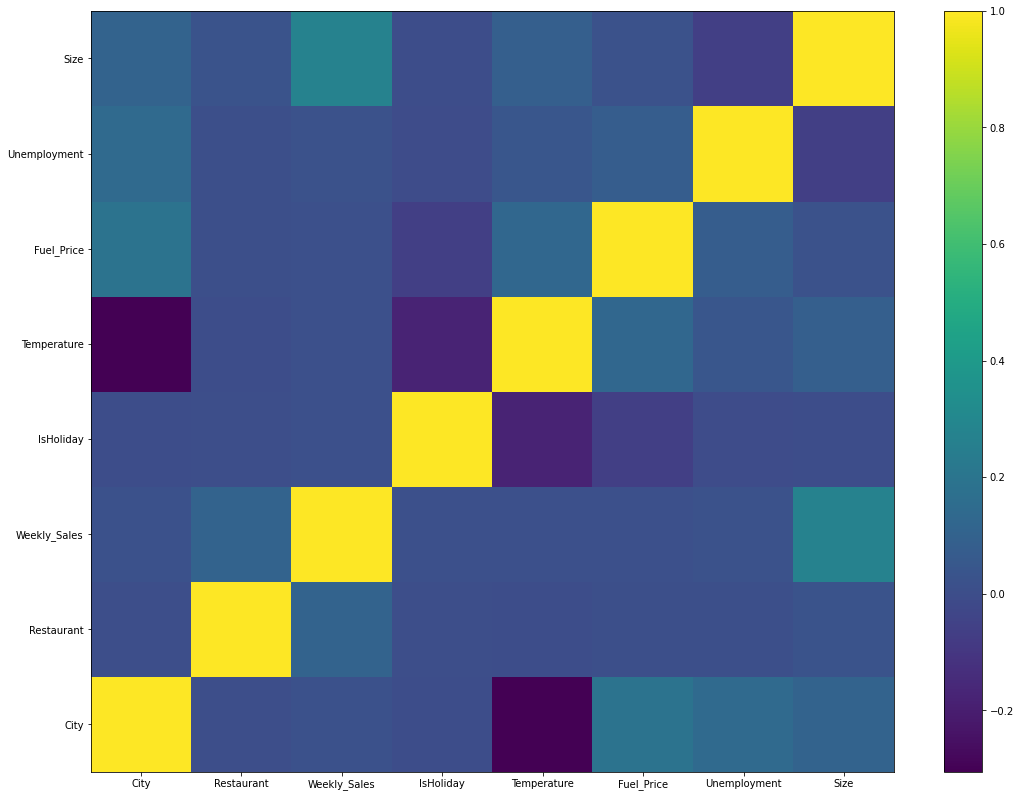

In [10]:
fig = plt.figure(figsize=(18, 14))
corr = train_dataset.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

## Data manipulation

Убераем плохие признаки с плохой кореляцией по отношению к зависимой переменной.

In [11]:
train_dataset['Month'] = pd.to_datetime(train_dataset['Date']).dt.month
dataset = train_dataset.drop(columns=["Date", "Fuel_Price", 'Unemployment'])
dataset

,City,Restaurant,Weekly_Sales,IsHoliday,Temperature,Size,Month
0,1,1,24924.50,False,42.31,151315,5
1,1,1,46039.49,True,38.51,151315,12
2,1,1,41595.55,False,39.93,151315,2
3,1,1,19403.54,False,46.63,151315,2
4,1,1,21827.90,False,46.50,151315,5
...,...,...,...,...,...,...,...
137933,20,99,12550.00,True,46.38,203742,11
137934,20,99,1645.00,False,41.64,203742,9
137935,20,99,4870.00,False,37.16,203742,12
137936,20,99,4420.00,False,40.19,203742,12


## Import sklearn

In [12]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error

## Algorithms

In [13]:
def extraTreesRegressor():
    model = ExtraTreesRegressor(n_estimators=100, max_features='auto', verbose=1, n_jobs=1)
    return model

def randomForestRegressor():
    model = RandomForestRegressor(n_estimators=100, max_features='log2', verbose=1)
    return model

def svm():
    model = SVR(kernel='rbf', gamma='auto')
    return model

def nn():
    model = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', verbose=3)
    return model

In [14]:
def calculate_error(y_test, predicted):
    return np.sqrt(mean_squared_error(y_test, predicted))

## Find the best model

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(dataset.drop(["Weekly_Sales"], axis=1),
                                                      dataset["Weekly_Sales"], test_size=0.3, shuffle=True)


In [16]:
model = extraTreesRegressor()
model.fit(x_train, y_train)
predict_train = model.predict(x_train)
predict_valid = model.predict(x_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [17]:
print("loss: {0}", calculate_error(y_train, predict_train))
print("val_loss: {0}", calculate_error(y_valid, predict_valid))

loss: {0} 27.302734852799563
val_loss: {0} 7063.264871461475


In [18]:
model = randomForestRegressor()
model.fit(x_train, y_train)
predict_train = model.predict(x_train)
predict_valid = model.predict(x_valid)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


In [19]:
print("loss: {0}", calculate_error(y_train, predict_train))
print("val_loss: {0}", calculate_error(y_valid, predict_valid))

loss: {0} 3637.5841925639115
val_loss: {0} 9593.274189568121


In [20]:
model = svm()
model.fit(x_train, y_train)
predict_train = model.predict(x_train)
predict_valid = model.predict(x_valid)

In [21]:
print("loss: {0}", calculate_error(y_train, predict_train))
print("val_loss: {0}", calculate_error(y_valid, predict_valid))

loss: {0} 27579.63288183701
val_loss: {0} 27385.52971609361


In [22]:
model = nn()
model.fit(x_train, y_train)
predict_train = model.predict(x_train)
predict_valid = model.predict(x_valid)

Iteration 1, loss = 374129933.51374888
Iteration 2, loss = 309633084.06352168
Iteration 3, loss = 309646327.12688357
Iteration 4, loss = 309638963.55730373
Iteration 5, loss = 309641342.59744108
Iteration 6, loss = 309654394.39958608
Iteration 7, loss = 309638633.85258263
Iteration 8, loss = 309592142.25849289
Iteration 9, loss = 309671797.32592845
Iteration 10, loss = 309638467.97308111
Iteration 11, loss = 309588947.65599519
Iteration 12, loss = 309594964.94936001
Iteration 13, loss = 309539002.23300153
Iteration 14, loss = 309557988.94002312
Iteration 15, loss = 309518529.78481162
Iteration 16, loss = 309544204.95846385
Iteration 17, loss = 309505177.58263588
Iteration 18, loss = 309483120.14890587
Iteration 19, loss = 309534969.20451099
Iteration 20, loss = 309427438.03718162
Iteration 21, loss = 309490397.77080226
Iteration 22, loss = 309448392.91063362
Iteration 23, loss = 309374249.67276126
Iteration 24, loss = 309397046.13320851
Iteration 25, loss = 309390693.35052812
Iteration

/home/sokol/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
print("loss: {0}", calculate_error(y_train, predict_train))
print("val_loss: {0}", calculate_error(y_valid, predict_valid))

loss: {0} 24734.049353177077
val_loss: {0} 24605.021826860684


используем модель которая лучше всего себя показала на тестовых данных.

In [24]:
best_model = randomForestRegressor()
best_model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.7s finished


RandomForestRegressor(max_features='log2', verbose=1)

## Prediction

In [25]:
test = pd.read_csv("./test.csv")
data = pd.read_csv("./data.csv")
restaurants = pd.read_csv("./restaurants.csv")
test_dataset = test.merge(data, how='left').merge(restaurants, how='left')
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset = test_dataset.drop(columns=["Date", "Fuel_Price", 'Unemployment'])
test_dataset

,City,Restaurant,IsHoliday,Temperature,Size,Month
0,1,1,False,49.01,151315,6
1,1,1,False,48.53,151315,1
2,1,1,False,54.11,151315,1
3,1,1,False,54.26,151315,1
4,1,1,False,56.55,151315,3
...,...,...,...,...,...,...
59606,20,99,True,76.36,203742,7
59607,20,99,False,64.84,203742,9
59608,20,99,False,60.94,203742,9
59609,20,99,False,60.77,203742,5


In [26]:
predicted_test = best_model.predict(test_dataset)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


In [27]:
test["Weekly_Sales"] = predicted_test

In [28]:
test

,City,Restaurant,Date,IsHoliday,Weekly_Sales
0,1,1,06-01-12,False,24290.2561
1,1,1,13-01-12,False,22383.9121
2,1,1,20-01-12,False,25126.6211
3,1,1,27-01-12,False,25105.4264
4,1,1,03-02-12,False,31281.2019
...,...,...,...,...,...
59606,20,99,07-09-12,True,11032.2112
59607,20,99,14-09-12,False,4172.8140
59608,20,99,21-09-12,False,4146.8855
59609,20,99,05-10-12,False,842.8735


In [29]:
test.to_csv('test_submit.csv', index=False)